In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# find current working directory using os module
os.getcwd()

'/Users/Tarek/Documents/masterRootAppFolder/EarlyDetection3DPrinterIssues'

In [5]:
DATA_PATH = '/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues/images'
# reset path to data directory
os.chdir(DATA_PATH)

In [6]:
cwd = os.getcwd()
cwd

'/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues/images'

In [7]:
os.listdir(cwd)

['104',
 '103',
 '102',
 '023',
 '.DS_Store',
 '022',
 'train_arrays',
 '101',
 '021',
 'test_arrays']

In [8]:
train_dir = os.path.join(cwd, 'train_arrays')
test_dir = os.path.join(cwd, 'test_arrays')
train_dir, test_dir

('/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues/images/train_arrays',
 '/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues/images/test_arrays')

In [9]:
os.listdir(train_dir)

['printer_id_104.npy',
 'printer_id_102_label.npy',
 'printer_id_102.npy',
 '.DS_Store',
 'printer_id_103.npy',
 'printer_id_101.npy',
 'printer_id_104_label.npy',
 'printer_id_103_label.npy',
 'printer_id_22.npy',
 'printer_id_101_label.npy',
 'printer_id_22_label.npy']

In [10]:
# load numpy arrays from npy files
# first try printer_id 22
train_22, train_22_labels = np.load(os.path.join(train_dir, 'printer_id_22.npy')), np.load(os.path.join(train_dir, 'printer_id_22_label.npy'))

In [11]:
train_22.shape, train_22_labels.shape

((593, 2764800), (593,))

In [12]:
# Create a function to convert numpy array to image and view image
def array_to_image(img_array):
        if img_array.shape != (720, 1280, 3):
            img_array = img_array.reshape(720, 1280, 3)
        img = Image.fromarray(img_array)
        return img

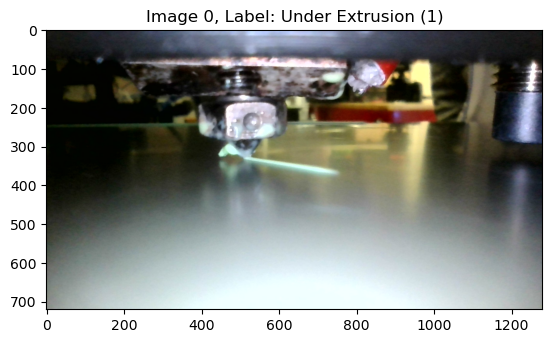

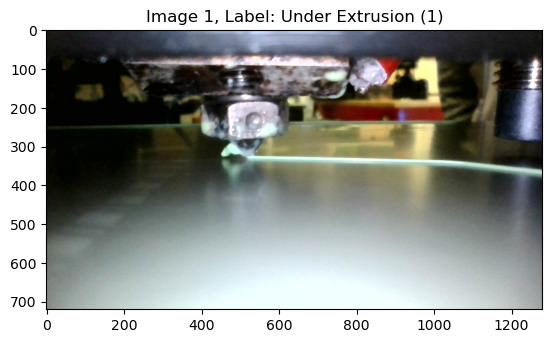

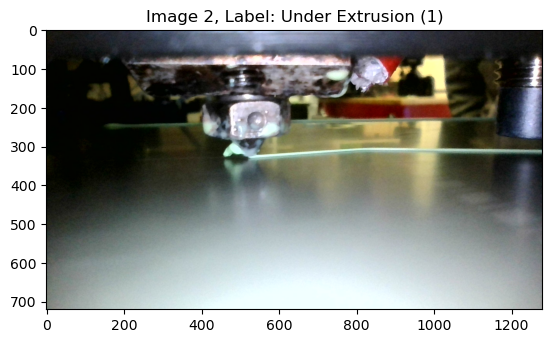

In [13]:
# loop through first 3 train arrays and view as PLT images
extrusion_label = lambda y: 'Under Extrusion' if y == 1 else 'No Extrusion' 
for i in range(3):
        label = train_22_labels[i]
        plt.imshow(array_to_image(train_22[i]))
        plt.title(f'Image {i}, Label: {extrusion_label(label)} ({label})')
        plt.show()

In [14]:
os.listdir(train_dir)

['printer_id_104.npy',
 'printer_id_102_label.npy',
 'printer_id_102.npy',
 '.DS_Store',
 'printer_id_103.npy',
 'printer_id_101.npy',
 'printer_id_104_label.npy',
 'printer_id_103_label.npy',
 'printer_id_22.npy',
 'printer_id_101_label.npy',
 'printer_id_22_label.npy']

In [19]:
# Create a function to get all unique printer ids from train and test directories
def get_printer_ids(train_dir, test_dir):
        train_ids = [int(file.split('_')[2].split('.')[0]) for file in os.listdir(train_dir) if file.startswith('printer_id')]
        test_ids = [int(file.split('_')[2].split('.')[0]) for file in os.listdir(test_dir) if file.startswith('printer_id')]
        return np.unique(train_ids), np.unique(test_ids)

In [20]:
train_ids, test_ids = get_printer_ids(train_dir, test_dir)

In [21]:
train_ids, test_ids

(array([ 22, 101, 102, 103, 104]), array([ 21,  22,  23, 101, 102, 103, 104]))

In [34]:
# Create a function to print all of the different shapes for each printer id file
def print_shapes(train_dir, train_ids):
        for id in train_ids:
                train = np.load(os.path.join(train_dir, f'printer_id_{id}.npy'))
                train_labels = np.load(os.path.join(train_dir, f'printer_id_{id}_label.npy'))
                print(f'Printer ID: {id}, Train Shape: {train.shape}, Train Labels Shape: {train_labels.shape}')

In [35]:
print_shapes(train_dir, train_ids)

Printer ID: 22, Train Shape: (593, 2764800), Train Labels Shape: (593,)
Printer ID: 101, Train Shape: (3080, 921600), Train Labels Shape: (3080,)
Printer ID: 102, Train Shape: (2696, 2764800), Train Labels Shape: (2696,)
Printer ID: 103, Train Shape: (2189, 6220800), Train Labels Shape: (2189,)
Printer ID: 104, Train Shape: (2374, 921600), Train Labels Shape: (2374,)


- 2764800 (1280 x 720 x 3 dimensions), (16:9 aspect ratio) for ID 22 and 101
- 921600 (640 x 480 x 3 dimensions), (4:3 aspect ratio) for ID 101 and 104
- 6220800 (1920 x 1080 x 3), (16:9 aspect ratio) for ID 103

Based on the above, will try using a fixed image size of 1280x720 because:
- 1280x720 maintains the 16:9 aspect ratio which is the same aspect ratio for 1920x1080
- there are more 1280x720 train image samples than 1920x1080s
- increasing number of pixels 1280x720 -> 1920x1080 may contribute to overfitting

In [26]:
# Create a function to combine all of the train ids into one array including the labels
def combine_train_arrays(train_dir, train_ids):
        X = []
        y = []
        for id in train_ids:
                X.append(np.load(os.path.join(train_dir, f'printer_id_{id}.npy')))
                y.append(np.load(os.path.join(train_dir, f'printer_id_{id}_label.npy')))
        return np.concatenate(np.array(X)), np.concatenate(np.array(y))

In [30]:
train_22_102, train_22_102_labels = combine_train_arrays(train_dir, [22, 102])

/var/folders/60/y3ghgqm10bgcylfwrkwb7y040000gs/T/ipykernel_77698/3673927309.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.concatenate(np.array(X)), np.concatenate(np.array(y))


In [33]:
train_22_102.shape, train_22_102_labels.shape

NameError: name 'train_22_102' is not defined

In [27]:
train_101, train_101_labels = combine_train_arrays(train_dir, [101])

In [39]:
train_101.shape, train_101_labels.shape

((3080, 921600), (3080,))

In [46]:
import torch
from torchvision import transforms

In [47]:
resize_transform = transforms.Resize((720, 1280))
pad_transform = transforms.Pad((280, 0, 280, 0), fill=0, padding_mode='constant')
to_tensor_transform = transforms.ToTensor()
normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transforms.Compose([resize_transform, pad_transform, to_tensor_transform, normalize_transform])

In [85]:
# Convert numpy array to tensor
train_101_tensor_ex_1 = torch.from_numpy(train_101[0]).float()

In [86]:
train_101_tensor_ex_1.shape

torch.Size([921600])

In [88]:
img_ex = train_101_tensor_ex_1.reshape(3, 640, 480)

In [89]:
img_ex.shape

torch.Size([3, 640, 480])

In [90]:
# Convert the tensor to a PIL Image object
pil_img_ex = transforms.ToPILImage()(img_ex)

In [91]:
transformed_img_ex = transforms.Resize((720, 1280))(pil_img_ex)

/var/folders/60/y3ghgqm10bgcylfwrkwb7y040000gs/T/ipykernel_77698/2950019720.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


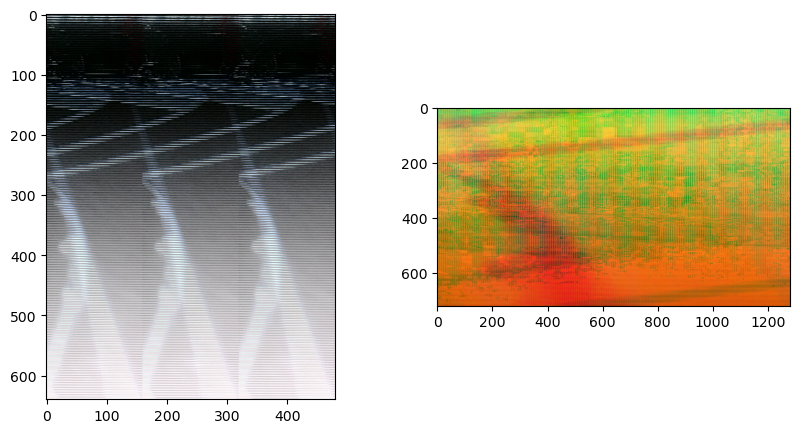

In [92]:
# Create 1x2 PIL image, first image is train_images_22[0], second image is reshaped_flat_img
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(Image.fromarray(train_101[0].reshape(640,480,3)))
ax[1].imshow(transformed_img_ex)
fig.show()

In [55]:
train_101_padded = transform(train_101_tensor)

ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [921600] and output size of [720, 1280]. Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [42]:
train_103, train_103_labels = combine_train_arrays(train_dir, [103])

In [43]:
train_103.shape, train_103_labels.shape

((2189, 6220800), (2189,))

build Pytorch model for train data

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

ModuleNotFoundError: No module named 'torch'

In [ ]:
# create a class for the dataset
class ExtrusionDataset(Dataset):
    """Extrusion dataset."""

    def __init__(self, npy_file, label_file, transform=None):
        """
        Args:
            npy_file (string): Path to the npy file with images.
            label_file (string): Path to the npy file with labels.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.images = np.load(npy_file)
        self.labels = np.load(label_file)
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample